In [ ]:
pip install plotly_express

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import plotly_express as px

In [ ]:
arti = pd.read_csv("./articles_dataset.csv")

In [ ]:
arti.head(5)

,title,category
0,Bitcoin is down 60 percent this year. Here's w...,Business & Finance
1,9 charts that explain the history of global we...,Business & Finance
2,Remember when legal marijuana was going to sen...,Criminal Justice
3,Obamacare succeeded for one simple reason: it'...,Health Care
4,The best Obamacare data comes from a home offi...,Health Care


In [ ]:
arti.dtypes

title       object
category    object
dtype: object

In [ ]:
import nltk
nltk.download('stopwords')  # download stopwords corpus

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))  # create a set of stopwords

arti['title'] = arti['title'].apply(lambda x: ' '.join([word.lower() for word in x.split() if word not in stop_words]))  # remove stopwords from title


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import nltk
from nltk.stem import PorterStemmer

nltk.download('punkt')  # download punkt tokenizer

stemmer = PorterStemmer()

arti['title'] = arti['title'].apply(lambda x: ' '.join([stemmer.stem(word) for word in nltk.word_tokenize(x)]))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
arti.shape

(435, 2)

In [ ]:
arti.head(5)

,title,category
0,bitcoin 60 percent year . here 's i 'm still o...,Business & Finance
1,9 chart explain histori global wealth,Business & Finance
2,rememb legal marijuana go send crime skyrocket ?,Criminal Justice
3,obamacar succeed one simpl reason : horribl un...,Health Care
4,the best obamacar data come home offic michigan,Health Care


In [ ]:
tags_counts = arti.groupby('category').aggregate({'title':np.count_nonzero}).reset_index().rename(columns = {'title':'category_count'})
px.bar(tags_counts,x='category',y='category_count',color='category')

In [ ]:
# Creating train-test Split
from sklearn.model_selection import train_test_split
X = arti[['title']]
y = arti[['category']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

vec = CountVectorizer()
clf = LogisticRegression()
pipe = make_pipeline(vec, clf)
pipe.fit(X_train.title, y_train.category)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('logisticregression', LogisticRegression())])

In [ ]:
from sklearn import metrics

def print_report(pipe):
    y_actuals = y_test['category']
    y_preds = pipe.predict(X_test['title'])
    report = metrics.classification_report(y_actuals, y_preds,zero_division=1)
    print(report)
    print("accuracy: {:0.3f}".format(metrics.accuracy_score(y_actuals, y_preds)))

print_report(pipe)

                    precision    recall  f1-score   support

Business & Finance       1.00      0.00      0.00         8
  Criminal Justice       0.87      0.80      0.83        25
       Health Care       0.74      0.99      0.84        80
 Politics & Policy       0.00      0.00      0.00         6
  Science & Health       1.00      0.00      0.00        12

          accuracy                           0.76       131
         macro avg       0.72      0.36      0.34       131
      weighted avg       0.77      0.76      0.68       131

accuracy: 0.756


In [ ]:
clf.classes_

array(['Business & Finance', 'Criminal Justice', 'Health Care',
       'Politics & Policy', 'Science & Health'], dtype=object)

In [ ]:
for i, tag in enumerate(clf.classes_):
    coefficients = clf.coef_[i]
    weights = list(zip(vec.vocabulary_.keys(),coefficients))
    print('Tag:',tag)
    print('Most Positive Coefficients:')
    print(sorted(weights,key=lambda x: -x[1])[:10])
    print('Most Negative Coefficients:')
    print(sorted(weights,key=lambda x: x[1])[:10])
    print("--------------------------------------")

Tag: Business & Finance
Most Positive Coefficients:
[('agre', 1.162004286329253), ('orient', 0.8156530510274849), ('move', 0.6202946003769992), ('hear', 0.5896073932338927), ('incarcer', 0.5860988719801455), ('complet', 0.5853020519943278), ('instanc', 0.5321890122619852), ('economist', 0.5125245749840652), ('give', 0.5035613315733016), ('job', 0.4946092812995461)]
Most Negative Coefficients:
[('45', -0.4313741615171291), ('pot', -0.32914866126244163), ('requir', -0.2272463796554489), ('inequ', -0.21416926306453596), ('46k', -0.2114902100801893), ('nuclear', -0.21088959726711604), ('british', -0.19889430364833482), ('teenag', -0.19729326185902255), ('expens', -0.18908605697193406), ('some', -0.1881471521967391)]
--------------------------------------
Tag: Criminal Justice
Most Positive Coefficients:
[('some', 1.6200284103087668), ('wellesley', 1.4462985941278694), ('20', 1.2003174185655467), ('funni', 1.0604193418550365), ('protest', 0.9305102655522647), ('obesityâ', 0.7428307004672053

In [ ]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107747 sha256=ccee2e17cef939a77327d707e660371f2c3e03b13fc1228bc93ff5fdfb46be6a
  Stored in directory: /root/.cache/pip/wheels/7b/26/a5/8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5


In [ ]:
import eli5
eli5.show_weights(clf, vec=vec, top=50)

# Misclassified Examples

In [ ]:
y_preds = pipe.predict(arti['title'])
arti['predicted_label'] = y_preds
misclassified_examples = arti[(arti['category']!=arti['predicted_label'])&(arti['category']=='Politics & Policy')&(arti['predicted_label']=='Criminal Justice')]

In [ ]:
misclassified_examples.head(2)

,title,category,predicted_label
420,virginia 's ex-governor sentenc two year prison,Politics & Policy,Criminal Justice


In [ ]:
eli5.show_prediction(clf, misclassified_examples['title'].values[0], vec=vec)

In [ ]:
X = arti[['title']]
y = arti[['category']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.svm import LinearSVC
vec = CountVectorizer()
clf = LinearSVC(random_state=42)
pipe = make_pipeline(vec, clf)
pipe.fit(X_train.title, y_train.category)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('linearsvc', LinearSVC(random_state=42))])

In [ ]:
from sklearn import metrics

def print_report(pipe):
    y_actuals = y_test['category']
    y_preds = pipe.predict(X_test['title'])
    report = metrics.classification_report(y_actuals, y_preds,zero_division=1)
    print(report)
    print("accuracy: {:0.3f}".format(metrics.accuracy_score(y_actuals, y_preds)))

print_report(pipe)

                    precision    recall  f1-score   support

Business & Finance       0.00      0.00      0.00         8
  Criminal Justice       0.80      0.80      0.80        25
       Health Care       0.79      0.93      0.85        80
 Politics & Policy       0.25      0.17      0.20         6
  Science & Health       0.67      0.17      0.27        12

          accuracy                           0.74       131
         macro avg       0.50      0.41      0.42       131
      weighted avg       0.71      0.74      0.71       131

accuracy: 0.740


In [ ]:
eli5.show_weights(clf, vec=vec, top=50)

In [ ]:
y_preds = pipe.predict(arti['title'])
arti['predicted_label'] = y_preds
misclassified_examples = arti[(arti['category']!=arti['predicted_label'])&(arti['category']=='Politics & Policy')&(arti['predicted_label']=='Criminal Justice')]

In [ ]:
correctly_classfied = arti[(arti['category']==arti['predicted_label'])]
correctly_classfied.head(2)

,title,category,predicted_label
0,bitcoin 60 percent year . here 's i 'm still o...,Business & Finance,Business & Finance
2,rememb legal marijuana go send crime skyrocket ?,Criminal Justice,Criminal Justice


In [ ]:
eli5.show_prediction(clf, correctly_classfied['title'].values[0], vec=vec)

In [ ]:
misclassified_examples.head(2)

,title,category,predicted_label
122,yellowston 50 squar mile `` zone death '' get ...,Politics & Policy,Criminal Justice
420,virginia 's ex-governor sentenc two year prison,Politics & Policy,Criminal Justice


In [ ]:
eli5.show_prediction(clf, misclassified_examples['title'].values[0], vec=vec)

In [ ]:
new_data = 'People are becoming fat everyday due to fast food'
y_pred = pipe.predict([new_data])
print(f'Predicted category: {y_pred[0]}')

Predicted category: Health Care


In [ ]:
# from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import pandas as pd
import string
import math
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

K-means clustering

In [ ]:
def kmeans_text_clustering(docs, n_clusters):
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(docs)
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    return kmeans.labels_

KMEANS ELBOW PLOT

In [ ]:
import matplotlib.pyplot as plt

def elbow_plot(docs):
    k_values = range(1, 400)
    inertias = []
    for k in k_values:
        labels = kmeans_text_clustering(docs, n_clusters=k)
        inertias.append(KMeans(n_clusters=k).fit(
            TfidfVectorizer().fit_transform(docs)).inertia_)
    plt.plot(k_values, inertias, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.title('Elbow plot for text document clustering')
    plt.show()


In [ ]:
doc=arti['title'].tolist()

Clustering doc number using k-means: 
[0 0 0 3 2 2 0 3 2 0 1 3 3 0 3 2 2 3 2 0 0 0 0 3 0 0 1 2 3 2 2 0 1 2 3 0 0
 0 3 1 3 0 0 0 0 1 1 3 3 0 3 1 0 0 0 0 0 0 3 3 2 0 1 0 2 3 1 3 3 0 0 0 3 3
 0 0 3 1 0 1 0 3 3 2 3 0 0 3 0 0 0 3 3 3 0 0 1 3 3 4 2 3 0 3 0 1 0 2 4 3 3
 3 3 2 2 2 0 3 2 2 2 3 1 1 1 4 0 0 0 0 3 0 3 0 1 0 1 4 0 0 3 1 1 4 0 4 4 4
 4 0 0 4 4 1 4 3 0 0 0 0 4 1 3 0 0 3 0 0 4 1 2 0 4 1 4 2 4 0 0 4 0 0 0 4 2
 0 0 2 0 2 0 3 1 0 4 1 0 4 1 0 0 3 0 1 1 1 2 1 0 4 0 4 1 3 4 3 3 4 3 3 0 3
 3 3 0 4 3 0 3 0 0 4 0 3 4 2 2 0 2 1 2 2 0 1 2 3 0 0 0 4 3 4 2 0 0 0 2 1 3
 0 2 1 1 0 0 0 0 0 0 0 1 0 2 1 0 3 3 3 3 2 3 2 0 2 1 0 3 0 0 1 0 0 0 2 0 1
 1 3 0 2 1 0 1 1 4 0 0 2 0 3 3 0 1 3 3 0 2 0 3 2 0 0 2 1 3 0 2 0 0 0 0 1 3
 2 2 0 0 2 1 0 0 0 1 1 2 3 2 0 2 0 3 0 0 0 2 3 2 0 0 1 3 3 0 0 2 3 3 0 3 0
 0 0 0 1 1 0 0 0 0 0 0 1 0 2 0 0 0 0 0 0 1 0 0 0 2 0 0 0 2 0 1 0 3 2 0 0 0
 0 0 0 0 0 3 0 1 1 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0]


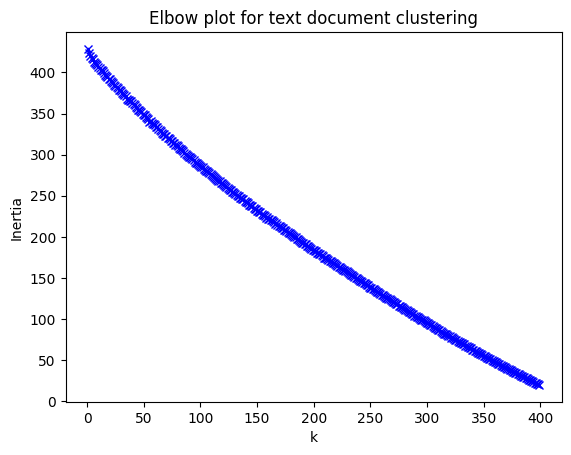

In [ ]:
labels = []
#functions
labels = kmeans_text_clustering(doc, n_clusters=5)
print("Clustering doc number using k-means: ")
print(labels)
elbow_plot(doc)